Video Game Reviews Text Analysis

By Fei Guo, Victor Li, Jonathan Lin, Xinyu Zheng

INFX 575 Sentiment Analysis

In [1]:
# load libraries
import pandas as pd
import numpy as np
import requests
import re
import os
import math
import itertools

# Matplotlib for plots
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
matplotlib.style.use('ggplot')

import statsmodels.formula.api as smf

# textblob for sentiment analysis
from textblob import TextBlob

from sklearn.utils import check_array
from sklearn.cross_validation import train_test_split

In [2]:
df = pd.read_csv("updated_results.csv", encoding='utf-8')

In [3]:
processed_reviews = pd.Series(df['processed'])

In [4]:
unprocessed = pd.Series(df['review'])

In [ ]:
# use Pattern Analysis http://www.clips.ua.ac.be/pattern
pa = []
for i in processed_reviews:
    blob = TextBlob(i)
    for sentence in blob.sentences:
        print(sentence.sentiment)
        pa.append(sentence.sentiment)

Sentiment(polarity=0.03151530182780183, subjectivity=0.48260582010582)
Sentiment(polarity=-0.010516840882694542, subjectivity=0.45874241837656454)
Sentiment(polarity=0.06427247864747859, subjectivity=0.43247881810381805)
Sentiment(polarity=0.02894778690697057, subjectivity=0.4736054421768706)
Sentiment(polarity=-0.0016884531590413993, subjectivity=0.44419545596016174)
Sentiment(polarity=0.05068452380952384, subjectivity=0.5307738095238094)
Sentiment(polarity=0.13687441643323991, subjectivity=0.49557189542483643)
Sentiment(polarity=0.011809426911885938, subjectivity=0.4716904634527582)
Sentiment(polarity=0.05287507105688924, subjectivity=0.47005334732607434)
Sentiment(polarity=-0.0012484695755372438, subjectivity=0.4872458681669205)
Sentiment(polarity=0.030260243632336647, subjectivity=0.4054125138427463)
Sentiment(polarity=0.006664520430343229, subjectivity=0.44196531316784476)
Sentiment(polarity=0.05244756401006398, subjectivity=0.4695491314241312)
Sentiment(polarity=0.005582906563298

In [ ]:
# use Pattern Analysis over preprocessed text
pau = []
for i in unprocessed:
    blob = TextBlob(i)
    for sentence in blob.sentences:
        print(sentence.sentiment)
        pau.append(sentence.sentiment)

Sentiment(polarity=-0.5, subjectivity=0.9)
Sentiment(polarity=0.375, subjectivity=0.75)
Sentiment(polarity=-0.08125, subjectivity=0.2833333333333334)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.6, subjectivity=1.0)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.15, subjectivity=0.50625)
Sentiment(polarity=0.2333333333333333, subjectivity=0.27499999999999997)
Sentiment(polarity=-0.4, subjectivity=0.4)
Sentiment(polarity=0.25, subjectivity=0.5)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.15, subjectivity=0.6625)
Sentiment(polarity=0.35, subjectivity=0.42500000000000004)
Sentiment(polarity=-0.4, subjectivity=0.4)
Sentiment(polarity=0.12743055555555555, subjectivity=0.6055555555555555)
Sentiment(polarity=0.3375, subjectivity=0.7375)
Sentiment(polarity=0.22000000000000003, subjectivity=0.4066666666666666)
Sentiment(polarity=0.0, subjectiv

In [12]:
df1 = pd.DataFrame(pa, columns = ['polarity', 'subjectivity'])
df2 = pd.DataFrame(pau, columns = ['full_polarity','full_subjectivity'])

In [13]:
add_sent = pd.concat([df, df1, df2], axis=1, join_axes=[df1.index])

In [15]:
add_sent.to_csv('results_with_pattern_analysis.csv', encoding='utf-8', index=False)

In [2]:
rpa = pd.read_csv("results_with_pattern_analysis.csv", encoding='utf-8')

In [3]:
rev_pol = rpa.groupby('reviewer').mean()
rev_pol.head()

,Unnamed: 0,score,score_100,review_length,polarity,subjectivity,full_polarity,full_subjectivity
reviewer,,,,,,,,
Alex Navarro,503.682243,3.261682,65.233645,1449.168224,0.042372,0.488741,0.055390,0.430996
Alex Rubens,899.000000,8.700000,87.000000,754.000000,0.163754,0.501951,0.000000,0.400000
Alexa Ray Corriea,1528.666667,7.500000,75.000000,1491.083333,0.062905,0.499461,0.064287,0.346842
Andrew Hayward,1054.000000,5.733333,57.333333,784.000000,0.086153,0.488385,0.046687,0.619683
Andy Corrigan,1051.750000,8.100000,81.000000,1016.750000,0.177912,0.477451,0.044687,0.402083


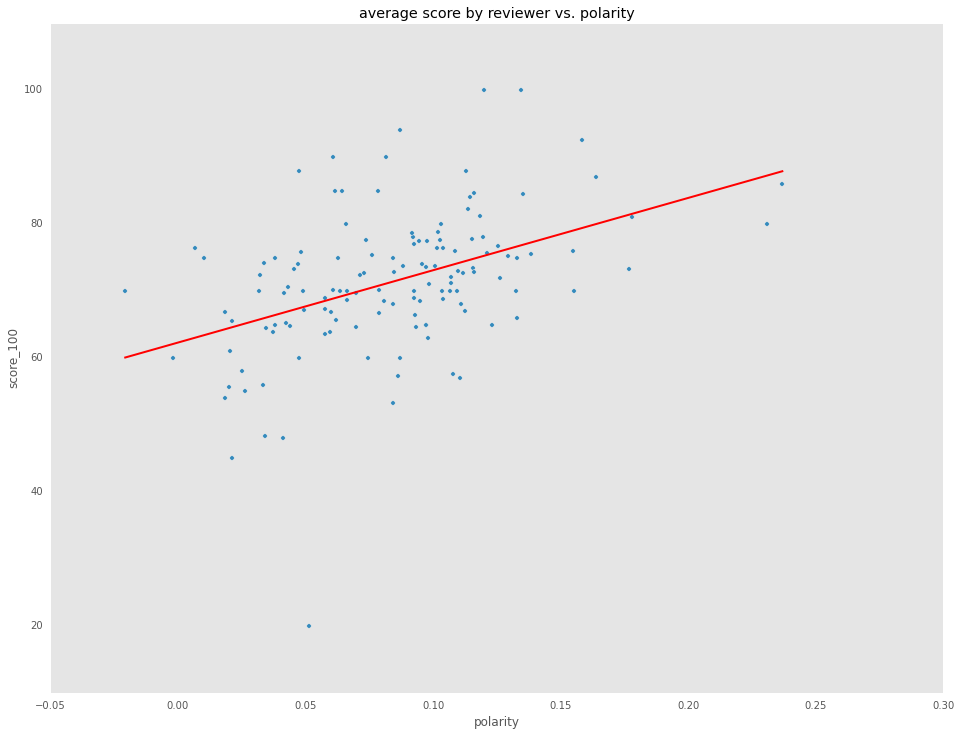

In [75]:
# create a linear model on the full data
lm = smf.ols(formula='score_100 ~ polarity', data=rev_pol).fit()
lm.params

# plot prediction of score_100 based on polarity
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
rev_pol.plot('polarity', 'score_100', kind='scatter',ax=ax, title="average score by reviewer vs. polarity")
X_new = pd.DataFrame({'polarity': [rev_pol.polarity.min(), rev_pol.polarity.max()]})
preds = lm.predict(X_new)
plt.plot(X_new, preds, c='r', linewidth=2)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
#ax.grid(False)
plt.grid(False)

In [83]:
# create a training and test set
train, test = train_test_split(rev_pol, test_size = 0.2)

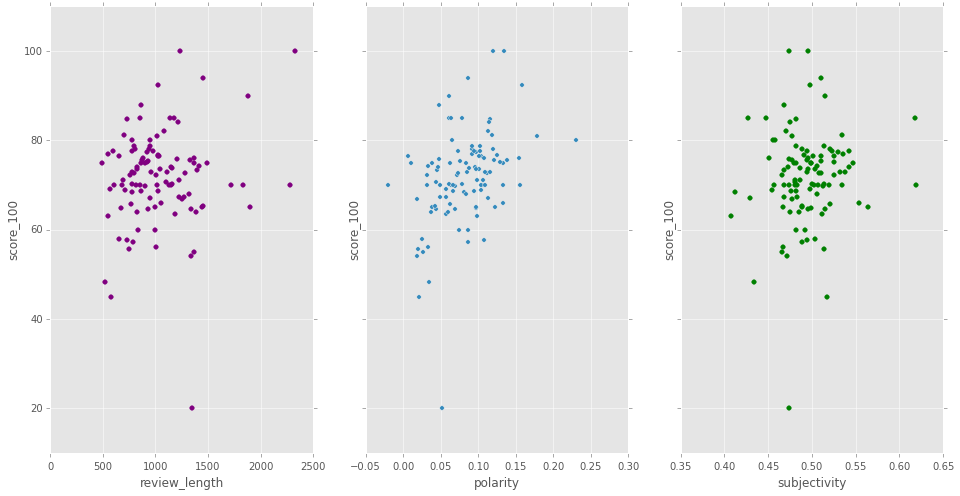

In [84]:
fig, axs = plt.subplots(1, 3, sharey=True)
train.plot(kind='scatter', x='review_length', y='score_100', color='purple', ax=axs[0], figsize=(16, 8))
train.plot(kind='scatter', x='polarity', y='score_100', ax=axs[1])
train.plot(kind='scatter', x='subjectivity', y='score_100', color='green', ax=axs[2])

In [89]:
# create a linear model on the training data
lm = smf.ols(formula='score_100 ~ polarity', data=train).fit()
lm.params

Intercept     63.202394
polarity     103.593128
dtype: float64

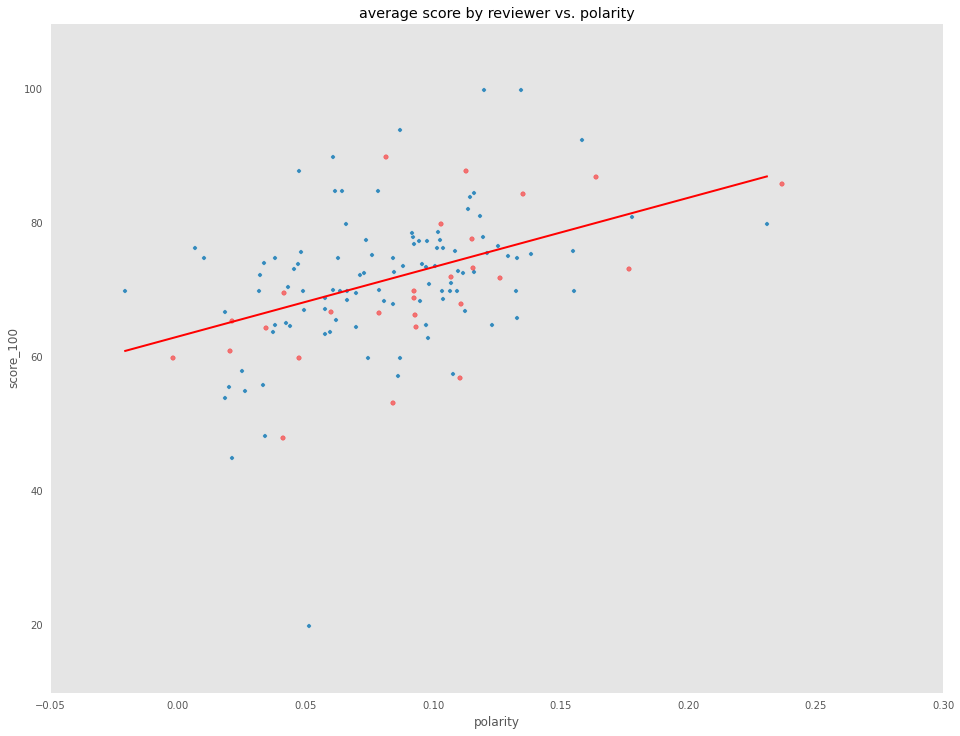

In [90]:
# plot prediction of score_100 based on polarity
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
train.plot('polarity', 'score_100', kind='scatter',ax=ax, title="average score by reviewer vs. polarity")
test.plot('polarity', 'score_100', kind='scatter', ax=ax, color='red', alpha=0.5)
X_new = pd.DataFrame({'polarity': [train.polarity.min(), train.polarity.max()]})
preds = lm.predict(X_new)
plt.plot(X_new, preds, c='r', linewidth=2)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
#ax.grid(False)
plt.grid(False)
plt.savefig('score_vs_polarity.png', bbox_inches='tight', dpi=300)

In [91]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              score_100   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     18.91
Date:                Mon, 08 Jun 2015   Prob (F-statistic):           3.21e-05
Time:                        17:07:04   Log-Likelihood:                -391.23
No. Observations:                 106   AIC:                             786.5
Df Residuals:                     104   BIC:                             791.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     63.2024      2.173     29.091      0.000        58.894    67.511
polarity     103.5931     23.825      4.348      0.000        56.347   150.839
==============================================================================
Omnibus:                       30.122   Durbin-Watson:                   2.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.041
Skew:                          -0.806   Prob(JB):                     7.04e-28
Kurtosis:                       8.071   Cond. No.                         25.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Add features

In [99]:
# create a binary variable to rank reviews as either good or bad based on the given score
def get_class(score_100):
    if score_100 >= 80:
        return 1
    else: return 0

In [100]:
rpa['is_good'] = rpa['score_100'].apply(get_class)

In [101]:
rpa['is_good'].value_counts()

0    1017
1     833
dtype: int64

In [102]:
site_dummies = pd.get_dummies(rpa.site, prefix='site').iloc[:, 1:]

In [104]:
# create dummy variables for site
# gamespot is baseline: site_IGN=0, site_GiantBomb=0
rpa = pd.concat([rpa, site_dummies], axis=1)
rpa.head(1)

,Unnamed: 0,date,game,link,platforms,review,reviewer,score,score_100,site,...,subjectivity,full_polarity,full_subjectivity,is_good,site_Giant Bomb,site_IGN,site_Giant Bomb,site_IGN,site_Giant Bomb,site_IGN
0,0,2008-05-23 13:00:00,SingStar,http://www.giantbomb.com/api/review/1900-1/,PlayStation 3,All these karaoke video games have got it all ...,Jeff Gerstmann,4,80,Giant Bomb,...,0.482606,-0.5,0.9,1,1,0,1,0,1,0


In [138]:
# Make predictions based on a feature collection

new_df = rpa.groupby(rpa['reviewer']).mean()

feature_cols = ['review_length', 'polarity', 
                'subjectivity', 'full_polarity', 'full_subjectivity', 
                'is_good', 'site_Giant Bomb','site_IGN']
X = new_df[feature_cols]
y = new_df['score_100']

# create a training and test set
X_train, X_test, Y_train, Y_test= train_test_split(X, new_df.score_100, test_size = 0.2, random_state=5)

# try using sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [139]:
pd.DataFrame(zip(feature_cols, lm.coef_))

,0,1
0,review_length,0.002169
1,polarity,49.310681
2,subjectivity,30.113137
3,full_polarity,-6.896559
4,full_subjectivity,1.931418
5,is_good,21.433159
6,site_Giant Bomb,0.928241
7,site_IGN,0.928241


In [140]:
# make predictions based on Linear Regression
lm.predict(X)

array([ 72.15952731,  89.69938156,  74.65014645,  64.19854516,
        84.56729212,  68.43208896,  87.75986007,  64.11049459,
        90.19492532,  71.74033041,  58.58468255,  66.67364922,
        75.98552826,  76.06037582,  73.1956141 ,  64.92158868,
        72.54925842,  72.10957976,  65.60576106,  76.82387845,
        65.54045773,  66.38869836,  63.96500649,  73.42306851,
        84.34689917,  61.2859609 ,  83.20467351,  65.5819636 ,
        69.59684273,  75.87787781,  61.5149708 ,  84.7755318 ,
        71.93311609,  72.84989102,  65.73901855,  76.68496048,
        67.95531263,  79.33207826,  79.73282285,  86.87071023,
        72.80489026,  63.54572477,  93.11442965,  59.3239702 ,
        86.2712801 ,  64.04545047,  77.14884886,  65.44586426,
        78.70043164,  61.68893672,  59.57037275,  65.20379346,
        63.09870201,  62.19845106,  72.36762152,  69.84761297,
        62.50036734,  59.994431  ,  76.15861416,  64.46417702,
        82.47421734,  66.28662312,  61.10644322,  64.88

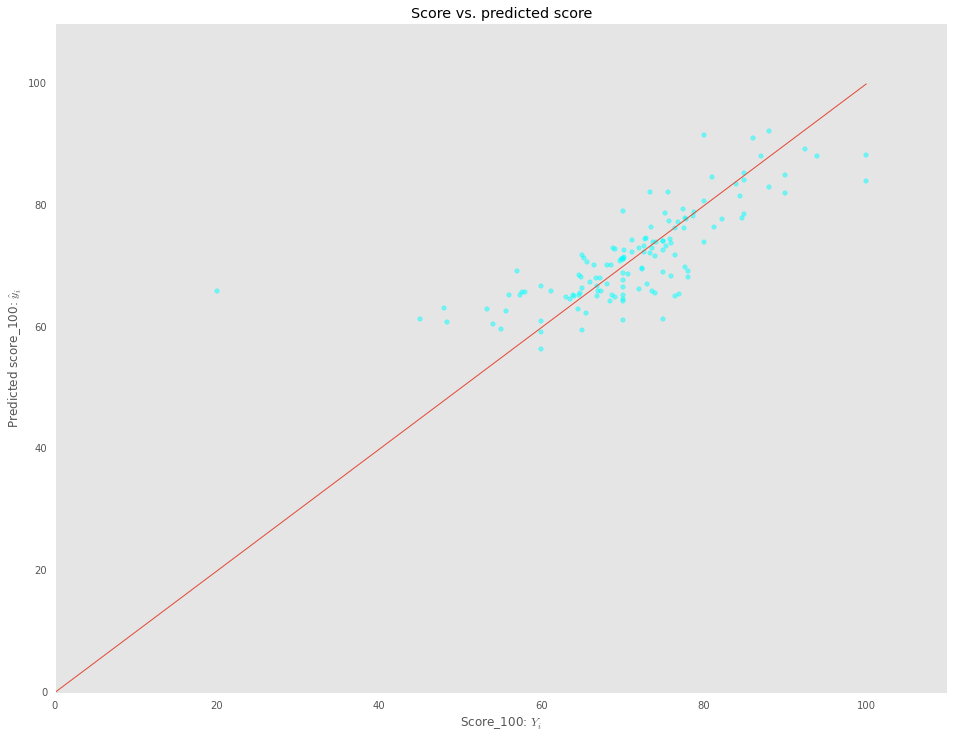

In [146]:
# plot score against predicted score
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
plt.scatter(new_df.score_100, lm.predict(X), color="cyan", alpha=0.5)
plt.xlabel("Score_100: $Y_i$")
plt.ylabel("Predicted score_100: $\hat{y}_i$")
plt.title("Score vs. predicted score")
plt.xlim(0,110)
plt.ylim(0,110)
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
plt.grid(False)
# add a 45 degree line
y=(0,100)
x=(0,100)
plt.plot(x,y)
plt.savefig('score_vs_predicted_score.png', bbox_inches='tight', dpi=300)

In [142]:
lm = LinearRegression()
lm.fit(X_train, Y_train)
predict_train = lm.predict(X_train)
predict_test = lm.predict(X_test)

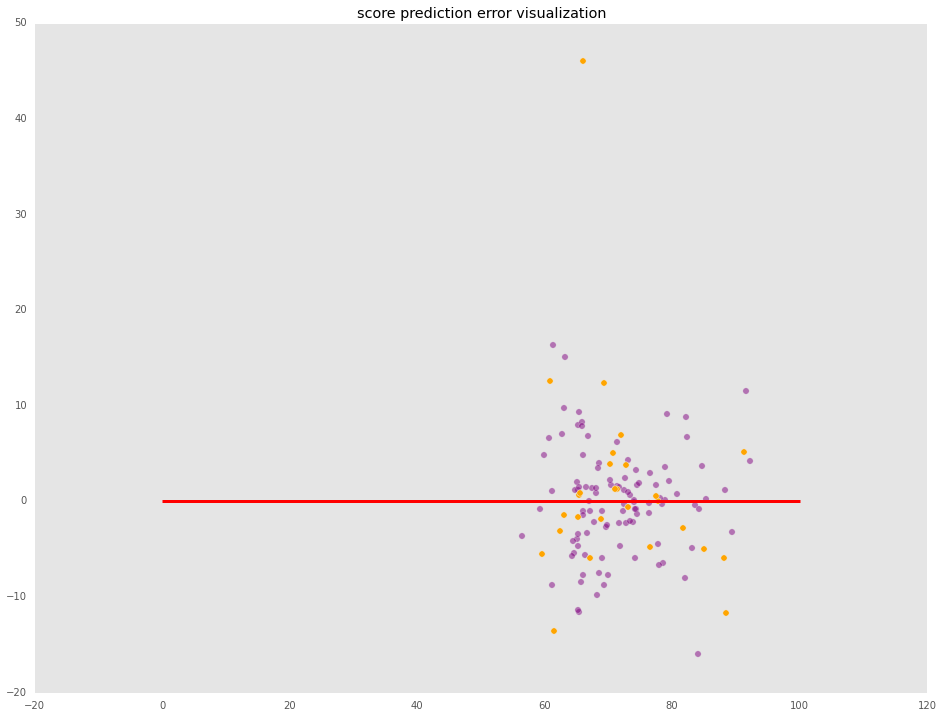

In [145]:
# visualize errors
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
plt.scatter(predict_train, predict_train - Y_train, c='purple', s=40, alpha=0.5)
plt.scatter(predict_test, predict_test - Y_test, c='orange', s=40)
plt.hlines(y=0, xmin=0, xmax=100, linewidth=3, color='r')
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
plt.title("score prediction error visualization")
plt.grid(False)
plt.savefig('score_prediction_error_visualization.png', bbox_inches='tight', dpi=300)